# Data exploration, insights & analysis

<font color=blue>

- **Most popular of all times = most number of hits**
- **More than 400 unique chords**

- Top 5 most frequent chords. Easy chords without bar and neighbour frets
novice = ['Am','C','D','Em','G']

- 5 following more frequent chords. Player able to navigate fretboard playing bar chords with neighbour frets
intermediate = ['E','A','F','Bm','Dm']

- Complex chords with non neighbour frets and dampening strings
advanced = [i for i in list(set_chords) if i not in (novice + intermediate)]

## Import Libraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load clean data

In [84]:
data = pd.read_csv('../Datasets/Chords_clean.csv',index_col=0)
data

,Artists,Songs,Rating,Votes,Level,A,A#,A#dim,A#m,A(maj),...,Gmaj,Gmaj7,Gmaj7/D,Go,Gsus,Gsus2,Gsus2/A,Gsus2/C,Gsus4,Gsus4/B
0,jeff buckley,hallelujah,4.87,39010,advanced,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,john legend,all of me,4.83,19766,advanced,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,ed sheeran,perfect,4.85,30548,advanced,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,passenger,let her go,4.84,16657,intermediate,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,jason mraz,im yours,4.74,11924,advanced,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,tracy chapman,fast car,4.81,583,advanced,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
995,the marshall tucker band,cant you see,4.80,1966,novice,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,creedence clearwater revival,fortunate son,4.65,457,intermediate,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,no doubt,dont speak,4.82,1147,advanced,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data exploration

In [85]:
data[["Artists","Songs","Level"]].describe()

,Artists,Songs,Level
count,989,989,989
unique,408,777,3
top,taylor swift,hallelujah,advanced
freq,33,6,746


<font color=blue> 
- **More than 400 artists registered in the dataset**
- **Most represented artist in the dataset is** *taylor swift*
- **Approx 800 different songs**
- **The song with the most versions in the dataset is** *hallelujah*

In [86]:
data[["Rating","Votes"]].describe()

,Rating,Votes
count,989.000000,989.000000
mean,4.773731,1948.488372
std,0.137249,2880.260299
min,3.540000,3.000000
25%,4.740000,501.000000
50%,4.810000,1133.000000
75%,4.850000,2222.000000
max,4.930000,39010.000000


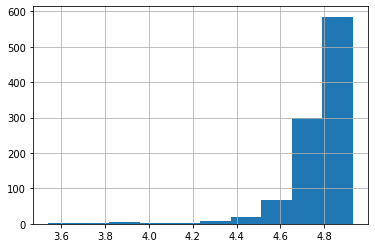

In [87]:
data.Rating.hist()
plt.show()

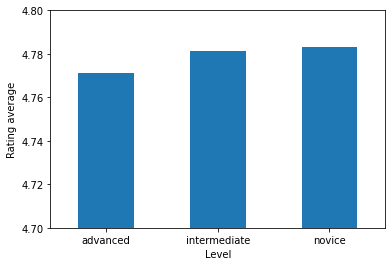

In [88]:
data.groupby("Level")["Rating"].mean().plot.bar()
plt.ylim(4.7,4.8)
plt.ylabel('Rating average')
plt.xticks(rotation=0)
plt.show()

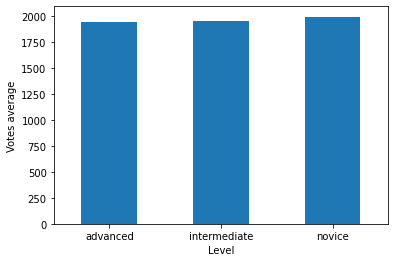

In [89]:
data.groupby("Level")["Votes"].mean().plot.bar()
plt.ylabel('Votes average')
plt.xticks(rotation=0)
plt.show()

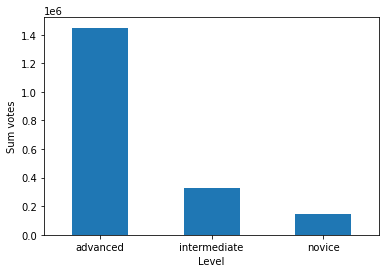

In [90]:
data.groupby("Level")["Votes"].sum().plot.bar()
plt.ylabel('Sum votes')
plt.xticks(rotation=0)
plt.show()

In [91]:
novice = data[(data["Level"]=="novice")]
novice[['Votes','Rating','Am','C','D','Em','G']].corr()

,Votes,Rating,Am,C,D,Em,G
Votes,1.000000,0.344863,0.114617,0.032690,-0.189583,-0.045607,0.148291
Rating,0.344863,1.000000,0.046871,-0.086309,0.090390,0.033053,0.100057
Am,0.114617,0.046871,1.000000,-0.062546,-0.367902,-0.170634,-0.089709
C,0.032690,-0.086309,-0.062546,1.000000,-0.053872,0.107082,-0.039841
D,-0.189583,0.090390,-0.367902,-0.053872,1.000000,0.262558,0.126938
Em,-0.045607,0.033053,-0.170634,0.107082,0.262558,1.000000,-0.130547
G,0.148291,0.100057,-0.089709,-0.039841,0.126938,-0.130547,1.000000


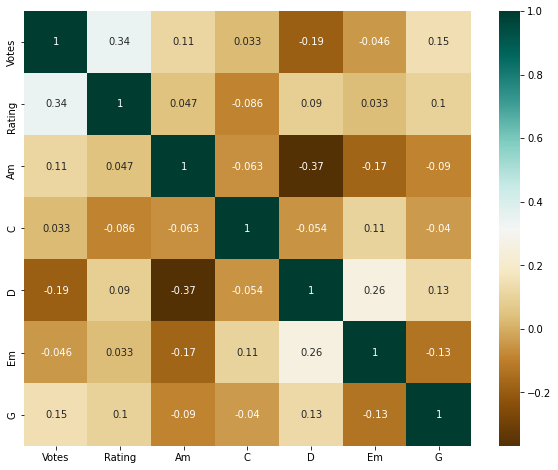

In [92]:
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(novice[['Votes','Rating','Am','C','D','Em','G']].corr(), cmap="BrBG" , annot=True)
plt.show()

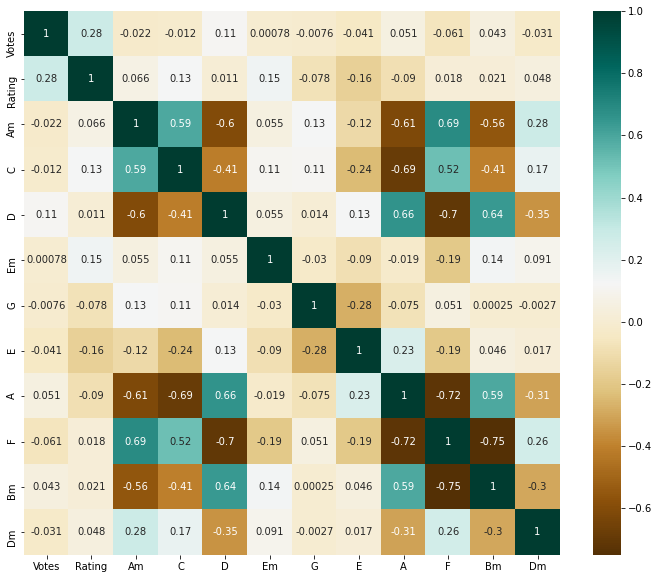

In [93]:
intermediate = data[(data["Level"]=="intermediate")]

fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(intermediate[['Votes','Rating','Am','C','D','Em','G','E','A','F','Bm','Dm']].corr(), cmap="BrBG" , annot=True)
plt.show()

In [94]:
data.groupby("Artists")["Rating"].mean().sort_values(ascending=False)

Artists
neutral milk hotel    4.93
pamungkas             4.93
rise against          4.92
kahitna               4.91
cage the elephant     4.91
                      ... 
psy                   4.05
carly rae jepsen      4.00
travie mccoy          3.78
ween                  3.77
the wallflowers       3.54
Name: Rating, Length: 408, dtype: float64

## Generate sub-datasets for Tableau

### Chords dataframe

In [95]:
novice = ['Am','C','D','Em','G']
intermediate = ['E','A','F','Bm','Dm']

chords = list(data.iloc[:,5:].sum().index)
frequency = list(data.iloc[:,5:].sum().values)
frequency

[323,
 4,
 1,
 5,
 1,
 1,
 3,
 26,
 5,
 4,
 3,
 2,
 1,
 19,
 6,
 79,
 1,
 2,
 1,
 1,
 1,
 2,
 18,
 1,
 1,
 1,
 6,
 22,
 1,
 2,
 2,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 443,
 1,
 3,
 5,
 2,
 5,
 1,
 1,
 13,
 1,
 2,
 72,
 1,
 3,
 1,
 2,
 1,
 10,
 1,
 1,
 5,
 19,
 1,
 2,
 2,
 2,
 29,
 113,
 1,
 1,
 5,
 2,
 8,
 1,
 60,
 1,
 1,
 1,
 4,
 1,
 3,
 1,
 2,
 101,
 4,
 3,
 5,
 1,
 4,
 3,
 9,
 2,
 1,
 1,
 2,
 3,
 2,
 6,
 1,
 1,
 1,
 1,
 1,
 5,
 2,
 1,
 3,
 223,
 7,
 1,
 2,
 1,
 2,
 44,
 1,
 1,
 2,
 1,
 2,
 4,
 1,
 2,
 6,
 5,
 673,
 19,
 1,
 1,
 2,
 5,
 1,
 1,
 1,
 5,
 2,
 74,
 1,
 1,
 8,
 0,
 1,
 1,
 1,
 1,
 33,
 2,
 10,
 40,
 24,
 1,
 6,
 1,
 10,
 2,
 31,
 1,
 1,
 1,
 1,
 1,
 3,
 6,
 3,
 1,
 1,
 2,
 76,
 3,
 47,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 37,
 1,
 2,
 1,
 2,
 8,
 5,
 588,
 6,
 1,
 1,
 2,
 2,
 10,
 2,
 1,
 13,
 3,
 4,
 5,
 98,
 1,
 1,
 2,
 1,
 14,
 1,
 5,
 2,
 1,
 1,
 74,
 1,
 6,
 1,
 4,
 1,
 7,
 4,
 3,
 1,
 1,
 3,
 1,
 5,
 1,
 1,
 8,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1

In [96]:
level = []

for i in chords:
    if i in novice:
        level.append("novice")
    elif i in intermediate:
        level.append("intermediate")
    else:
        level.append("advanced")
level

['intermediate',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'novice',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced',
 'advanced

In [97]:
df_chords = pd.DataFrame({
    "chords":chords,
    "frequency":frequency,
    "level":level
})

df_chords

,chords,frequency,level
0,A,323,intermediate
1,A#,4,advanced
2,A#dim,1,advanced
3,A#m,5,advanced
4,A(maj),1,advanced
...,...,...,...
441,Gsus2,8,advanced
442,Gsus2/A,1,advanced
443,Gsus2/C,1,advanced
444,Gsus4,21,advanced


#### Export chords dataframe

In [98]:
df_chords.to_excel('../Datasets/chords.xlsx', sheet_name='chords')

### Level dataframe

In [99]:
level = ["novice","intermediate","advanced"]

songs_qty = list(data.Level.value_counts().sort_values(ascending=True).values)

chords_qty = [len(novice),len(intermediate),len(chords)-len(novice)-len(intermediate)]

In [100]:
songs_qty

[74, 169, 746]

In [101]:
df_level = pd.DataFrame({
    "level":level,
    "songs_qty":songs_qty,
    "chords_qty":chords_qty
})

df_level

,level,songs_qty,chords_qty
0,novice,74,5
1,intermediate,169,5
2,advanced,746,436


#### Export Level dataframe

In [102]:
df_level.to_excel('../Datasets/level.xlsx', sheet_name='level')

### Explore Top Artists / Top Songs

In [103]:
data["Artists"].value_counts()

taylor swift      33
ed sheeran        30
the beatles       30
adele             20
coldplay          16
                  ..
julia michaels     1
lord huron         1
stevie wonder      1
toto               1
clean bandit       1
Name: Artists, Length: 408, dtype: int64

In [104]:
data["Artists"].value_counts().nlargest(20)

taylor swift       33
ed sheeran         30
the beatles        30
adele              20
coldplay           16
bruno mars         13
maroon 5           12
oasis              11
bob dylan          11
green day          10
misc soundtrack    10
queen               9
one direction       9
rihanna             9
sam smith           8
radiohead           7
justin bieber       7
jason mraz          7
katy perry          7
nirvana             7
Name: Artists, dtype: int64

In [105]:
most_pop_art = list(data["Artists"].value_counts().nlargest(5).index)
most_pop_art

['taylor swift', 'ed sheeran', 'the beatles', 'adele', 'coldplay']

In [106]:
data[data["Artists"]=='ed sheeran'].iloc[:,5:].sum().sort_values(ascending=False)

G            27
C            21
Em           19
D            15
Am           13
             ..
Eb6           0
Eb7           0
Eb9           0
EbM7          0
Dadd11/F#     0
Length: 446, dtype: int64

In [107]:
data[data["Artists"]=="eric clapton"].iloc[:,5:].sum().nlargest(15)

C       4
D       3
E       3
E7      3
Em      3
G       3
A       2
Am      2
Bb      2
D/F#    2
Dm      2
F#m     2
A/E     1
A7/E    1
B       1
dtype: int64

In [108]:
artists = list(data["Artists"].value_counts().nlargest(20).index)
tabs = list(data["Artists"].value_counts().nlargest(20).values)

In [109]:
tabs

[33, 30, 30, 20, 16, 13, 12, 11, 11, 10, 10, 9, 9, 9, 8, 7, 7, 7, 7, 7]

In [110]:
data[data.Artists=="eric clapton"]

,Artists,Songs,Rating,Votes,Level,A,A#,A#dim,A#m,A(maj),...,Gmaj,Gmaj7,Gmaj7/D,Go,Gsus,Gsus2,Gsus2/A,Gsus2/C,Gsus4,Gsus4/B
166,eric clapton,tears in heaven,4.75,2677,advanced,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
370,eric clapton,wonderful tonight,4.84,3348,advanced,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
525,eric clapton,tears in heaven,4.81,1331,advanced,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
590,eric clapton,layla,4.84,1877,advanced,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
data["Artists"].apply(lambda x:x.capitalize())

0                      Jeff buckley
1                       John legend
2                        Ed sheeran
3                         Passenger
4                        Jason mraz
                   ...             
994                   Tracy chapman
995        The marshall tucker band
997    Creedence clearwater revival
998                        No doubt
999                     Alicia keys
Name: Artists, Length: 989, dtype: object

In [112]:
data

,Artists,Songs,Rating,Votes,Level,A,A#,A#dim,A#m,A(maj),...,Gmaj,Gmaj7,Gmaj7/D,Go,Gsus,Gsus2,Gsus2/A,Gsus2/C,Gsus4,Gsus4/B
0,jeff buckley,hallelujah,4.87,39010,advanced,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,john legend,all of me,4.83,19766,advanced,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,ed sheeran,perfect,4.85,30548,advanced,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,passenger,let her go,4.84,16657,intermediate,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,jason mraz,im yours,4.74,11924,advanced,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,tracy chapman,fast car,4.81,583,advanced,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
995,the marshall tucker band,cant you see,4.80,1966,novice,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,creedence clearwater revival,fortunate son,4.65,457,intermediate,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,no doubt,dont speak,4.82,1147,advanced,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Hypothesis testing

In [113]:
real = (len(data[data.Level=="novice"])+len(data[data.Level=="intermediate"]))/len(data)

In [114]:
real

0.24570273003033366

In [115]:
len(data[data.Level=="novice"])+len(data[data.Level=="intermediate"])

243

In [116]:
len(data)

989

In [117]:
from statsmodels.stats.proportion import proportions_ztest

# Ho: the proportion of Novice & Intermediate songs is more than 25%.
# Ha: the proportion of Novice & Intermediate songs is less than 25%.

alpha = 0.05

st, p = proportions_ztest(count=243, nobs=989, value=0.25, alternative='smaller')

print("Null hypothes is rejected") if p < alpha else print("Null hypothesis can't be rejected")
print('Statistic: ', st)
print('p-value: ', p)

Null hypothesis can't be rejected
Statistic:  -0.3139167759265196
p-value:  0.37679212431460907


In [118]:
from statsmodels.stats.proportion import proportions_ztest

# Ho: the proportion of Novice & Intermediate songs is more than 25%.
# Ha: the proportion of Novice & Intermediate songs is less than 25%.

alpha = 0.05

st, p = proportions_ztest(count=243, nobs=989, value=0.3, alternative='smaller')

print("Null hypothes is rejected") if p < alpha else print("Null hypothesis can't be rejected")
print('Statistic: ', st)
print('p-value: ', p)

Null hypothes is rejected
Statistic:  -3.9664307922950734
p-value:  3.647847352611851e-05
